**Importing the Required Libraries and Packages**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Perceptron import Perceptron
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

**Data Loading**

In [6]:
df = pd.read_csv('iris.data', header=None)

In [7]:
#displaying the last 4 rows
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Extracting the First 100 Rows**

In [8]:
#Encoding the categorical column
y = df.iloc[0:100, 4].values
y = np.where(y=="Iris-versicolor", 0,1)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

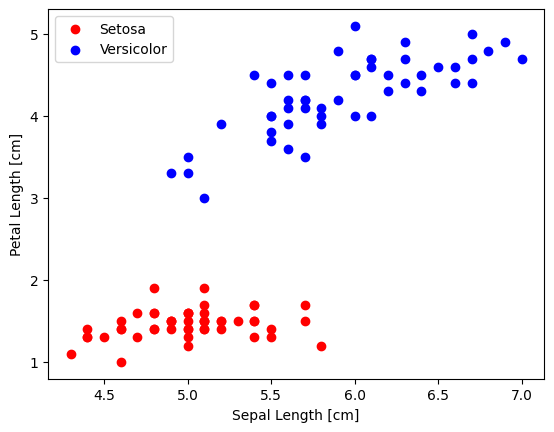

In [9]:
#Extracting the sepal and petal length
X = df.iloc[0:100, [0,2]].values


#plotting data
plt.scatter(
    X[:50, 0], X[:50,1],
    color='red', marker='o', label='Setosa'
)
plt.scatter(
    X[50:100, 0], X[50:100,1],
    color='blue', marker='o', label='Versicolor'
)

plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

**Data Splitting**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Model Laoding and Training**

In [11]:
ppn = Perceptron(lr=0.001, n_iters=10)

ppn.fit(X_train,y_train)

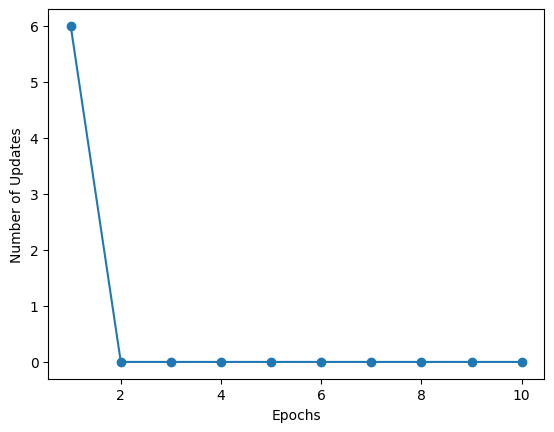

In [14]:
plt.plot(
    range(1, len(ppn.errors) + 1),
    ppn.errors, marker='o'
)

plt.xlabel('Epochs')
plt.ylabel("Number of Updates")
plt.show()

In [15]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')


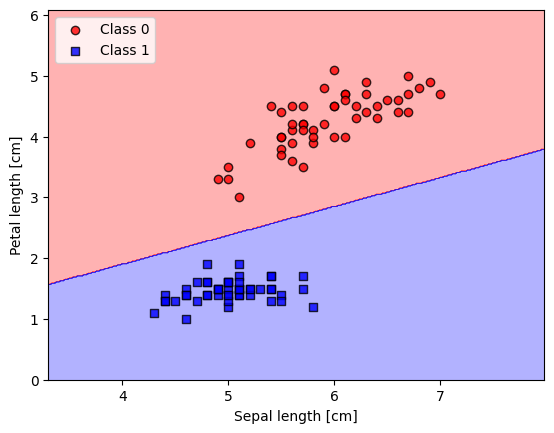

In [16]:
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [17]:
y_pred = ppn.predict(X_test)
ppn.accuracy(
    y_pred=y_pred,
    y_true=y_test
)

'Accuracy Score : 1.0'